In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [32]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])


minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])


In [43]:
# Combine Fit and Transform into Single 
df_std_fitTrans = preprocessing.StandardScaler().fit_transform(df[['Alcohol', 'Malic acid']])

In [33]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [34]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


In [35]:
df_stdscaller=pd.DataFrame({'std_Alcho': df_std[:,0],'std_Malic':df_std[:,1]})
df_minmaxscaller=pd.DataFrame({'minmax_Alcho': df_minmax[:,0],'minmax_Malic':df_minmax[:,1]})

In [42]:
pd.concat([df,df_stdscaller,df_minmaxscaller],axis=1).head()

,Class label,Alcohol,Malic acid,std_Alcho,std_Malic,minmax_Alcho,minmax_Malic
0,1,14.23,1.71,1.518613,-0.562250,0.842105,0.191700
1,1,13.20,1.78,0.246290,-0.499413,0.571053,0.205534
2,1,13.16,2.36,0.196879,0.021231,0.560526,0.320158
3,1,14.37,1.95,1.691550,-0.346811,0.878947,0.239130
4,1,13.24,2.59,0.295700,0.227694,0.581579,0.365613


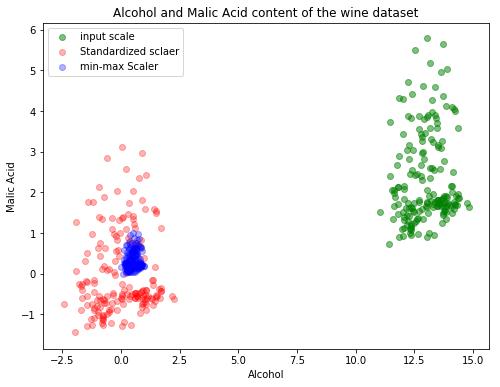

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

plt.scatter(df_std[:,0], df_std[:,1], color='red',label='Standardized sclaer',
              alpha=0.3)

plt.scatter(df_minmax[:,0], df_minmax[:,1],label='min-max Scaler',
            color='blue',   alpha=0.3)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')